In [13]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data = load_google_sheet()

[F] FUCTION: load_google_sheet()
[✔️] Completed: load_google_sheet() - Time taken: 3.61 seconds


In [15]:
data.head()

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.


In [16]:
data['free_text_len'] = data['free_text'].str.split().apply(len)
data['do_better_len'] = data['do_better'].str.split().apply(len)

In [5]:
data.head()

,time,rating,free_text,do_better,free_text_len,do_better_len
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,13,3
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,4,0
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,8,5
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,5,5
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,44,6


In [ ]:
import seaborn as sns
sns.histplot(data=data, x='free_text_len')

In [ ]:
sns.histplot(data=data, x='do_better_len')

In [ ]:
remove_list = []
for text in data['do_better']:
    if text == '':
        pass
    elif len(text) < 12 and len(text) > 1:
        remove_list.append(text)
        
print(remove_list)

In [ ]:
data.isna().sum()

In [17]:
patient_feedback_categories = [
    "Appointment Availability",
    "Reception and Administration",
    "Consultation Quality",
    "Treatment Efficacy",
    "Facility Cleanliness and Comfort",
    "Communication and Information",
    "Wait Times",
    "Confidentiality and Privacy",
    "Telehealth Services",
    "Follow-up Care",
    "Billing and Insurance Handling",
    "COVID-19 Measures",
    "Patient Empowerment",
    "Accessibility",
    "Overall Satisfaction",
    "No Improvement Suggestion",
]


In [18]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli") 

In [20]:
text_list = []
label_list = []
count = 0
for text in data['do_better']:
    count = count + 1
    if text != '':
        output = classifier(text, patient_feedback_categories)
        text_list.append(text)
        label_list.append(output['labels'][0])
        print(count)
        count = count + 1
    else:
        print("Empty input string")
        count = count +1



1
Empty input string
5
7
9
Empty input string
13
15
Empty input string
Empty input string
21
23
Empty input string
Empty input string
29
31
33
35
37
Empty input string
41
43
Empty input string
Empty input string
49
Empty input string
Empty input string
55
Empty input string
59
Empty input string
63
65
Empty input string
Empty input string
Empty input string
Empty input string
75
77
Empty input string
Empty input string
Empty input string
85
87
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
101
Empty input string
105
Empty input string
Empty input string
111
Empty input string
115
117
119
121
123
125
Empty input string
129
Empty input string
133
135
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
147
149
151
153
Empty input string
157
159
161
163
Empty input string
Empty input string
169
171
173
175
177
179
181
183
Empty input string
187
Empty input string
191
193
195
197
19

In [21]:
text_list

['Keep it up',
 'No. It was the best.',
 'the receptionist was very unkind ',
 'No. I was happy with everything.  ',
 'No. It is already perfect.',
 'No',
 'I think it is getting better, the ladies at the reception can be so rude, it would not do any harm to smile, be friendly, put the patient at ease',
 'The basement is a bit dark and gloomy and reception area could also do with an upgrade ',
 "Earl's court surgery is really lucky to have Nurse Alex.",
 'No',
 'No',
 'Yes, of course, she showed me the easy and a great way to apply for my medicine',
 'No answer ',
 'Everything was done professionally. ',
 'The staff and especially the GP are very good in service. ',
 'wait time',
 'No',
 'Everything  fine  ',
 'Can’t think of anything ',
 "Yes they didn't have my xray for my arm  a waste off time for me there! ",
 'Sendn me to Specialist,the best.',
 'More knowledge newly qualified doctors , enthusiastic ',
 'Nothing I can think about ',
 'Yes ',
 'More doctors in the surgery. ',
 'Eve

In [22]:
my_dict = {
    "text": text_list,
    "labels": label_list
}

label_df = pd.DataFrame(my_dict)
label_df

,text,labels
0,Keep it up,Follow-up Care
1,No. It was the best.,No Improvement Suggestion
2,the receptionist was very unkind,Reception and Administration
3,No. I was happy with everything.,Overall Satisfaction
4,No. It is already perfect.,No Improvement Suggestion
...,...,...
331,Nothing,No Improvement Suggestion
332,I do not have any improvement suggestion at th...,No Improvement Suggestion
333,Staff at reception can be unfriendly and not v...,Reception and Administration
334,No,No Improvement Suggestion


<Axes: xlabel='count', ylabel='labels'>

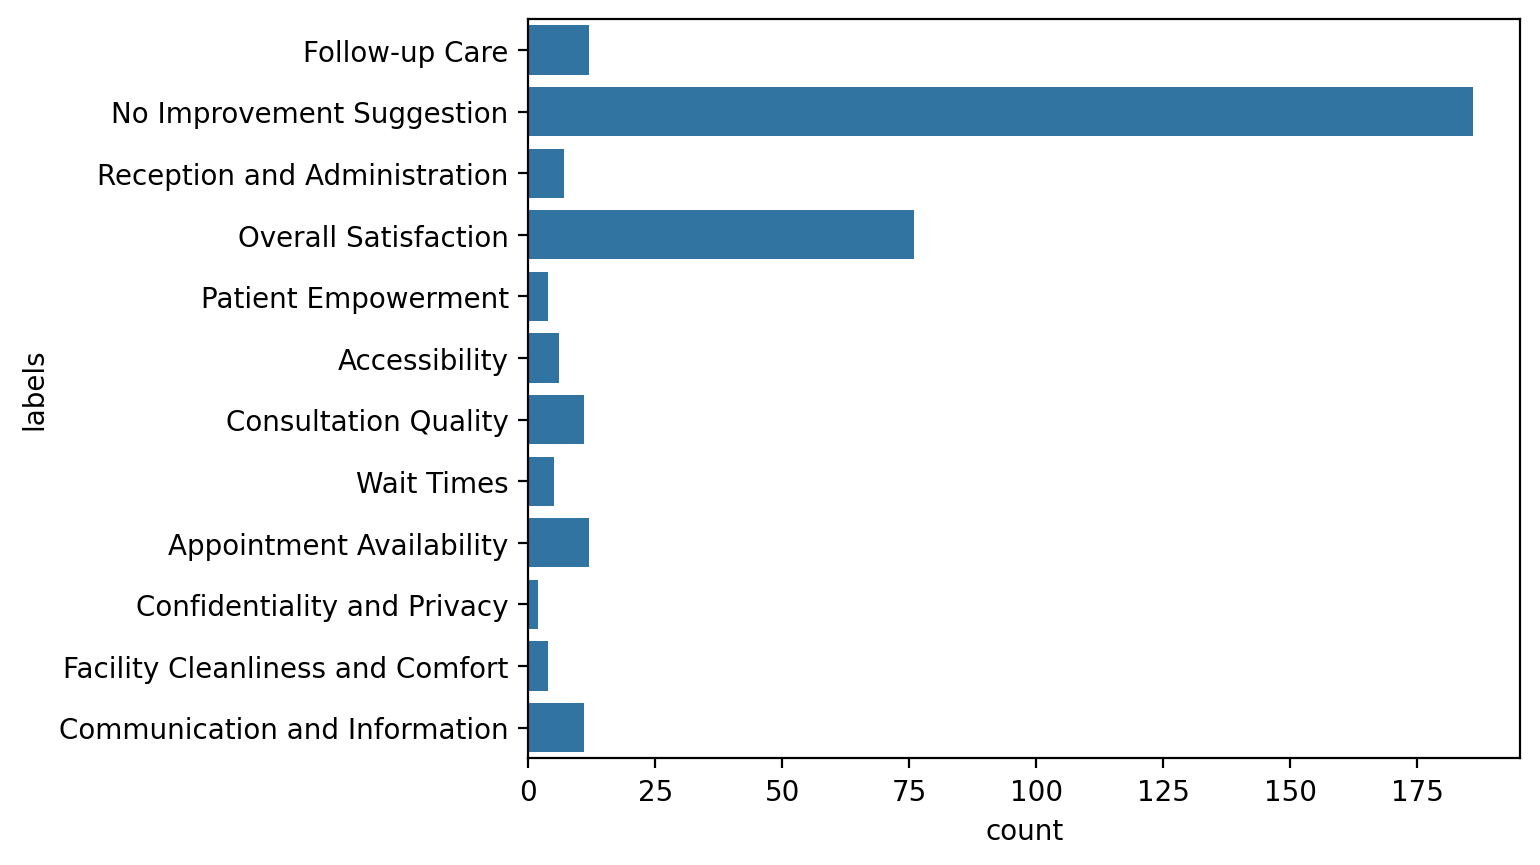

In [24]:
sns.countplot(label_df['labels'])

In [27]:
processed = pd.read_csv('../friendsfamilytest/data/data.csv')

ParserError: Error tokenizing data. C error: Expected 10 fields in line 506, saw 12
